In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install keras

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
mean_a = df['bmi'].mean()
df['bmi'].fillna(mean_a, inplace=True)

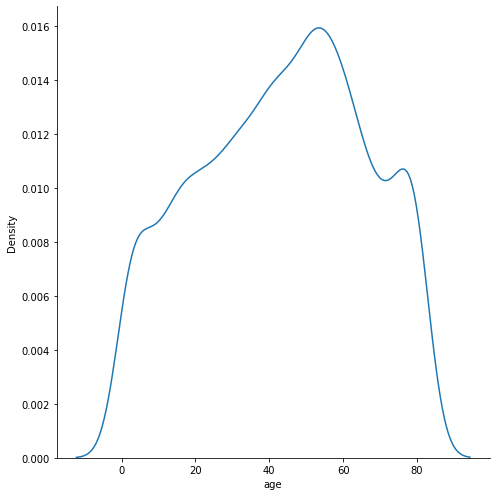

In [7]:
sns.displot(df['age'], kind='kde', height = 7)

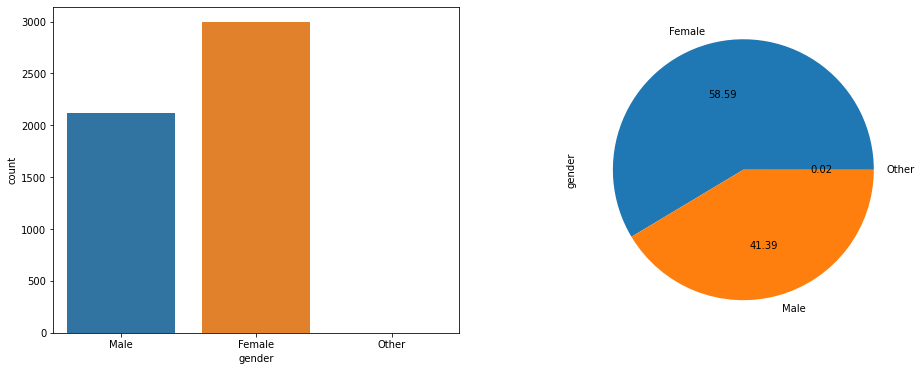

In [8]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x = df['gender'])
plt.subplot(1,2,2)
df['gender'].value_counts().plot(kind='pie',autopct="%.2f")

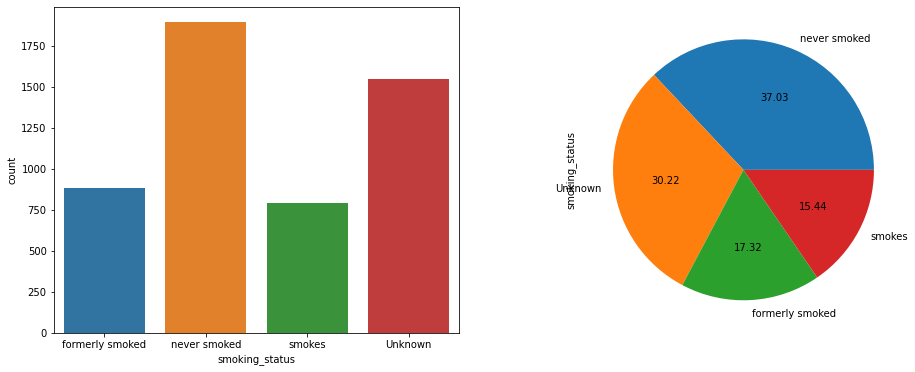

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x = df['smoking_status'])
plt.subplot(1,2,2)
df['smoking_status'].value_counts().plot(kind='pie',autopct="%.2f")

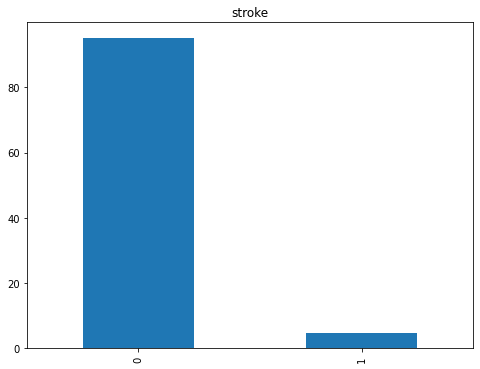

In [11]:
fig , ax = plt.subplots(figsize=(8,6))

df['stroke'].value_counts(normalize=True).mul(100).plot.bar()

plt.title("stroke")
plt.show()

In [12]:
from sklearn.utils import resample

#Upsampling minority class: stroke = 1
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]

df_minority_oversampled = resample(df_minority, replace = True, n_samples=4700, random_state=42)

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

df_oversampled['stroke'].value_counts()

0    4861
1    4700
Name: stroke, dtype: int64

In [13]:
df = df_oversampled

In [14]:
df.drop(columns=['id'], axis=1, inplace=True)

X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [15]:
X.shape

(9561, 10)

In [16]:
y.shape

(9561,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'ever_married', 'work_type',	'Residence_type', 'smoking_status' ]


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)


preprocessor = preprocessor.fit(X)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
ANN_classifier = Sequential()

ANN_classifier.add(Dense(units=20, input_dim=X_train.shape[1], activation='relu'))

ANN_classifier.add(Dense(units=20,activation='relu'))
 
ANN_classifier.add(Dense(units=1,activation='sigmoid'))
 
ANN_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ANN_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                440       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = ANN_classifier.fit(X_train,y_train, batch_size=8 , epochs=60, validation_split=0.2, verbose=1)

Epoch 1/60
670/670 [==============================] - 4s 4ms/step - loss: 0.5016 - accuracy: 0.7627 - val_loss: 0.4816 - val_accuracy: 0.7707
Epoch 2/60
670/670 [==============================] - 2s 3ms/step - loss: 0.4554 - accuracy: 0.7887 - val_loss: 0.4509 - val_accuracy: 0.8051
Epoch 3/60
670/670 [==============================] - 3s 5ms/step - loss: 0.4410 - accuracy: 0.7954 - val_loss: 0.4402 - val_accuracy: 0.8088
Epoch 4/60
670/670 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8037 - val_loss: 0.4314 - val_accuracy: 0.8125
Epoch 5/60
670/670 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8085 - val_loss: 0.4215 - val_accuracy: 0.8073
Epoch 6/60
670/670 [==============================] - 2s 2ms/step - loss: 0.4044 - accuracy: 0.8156 - val_loss: 0.4150 - val_accuracy: 0.8125
Epoch 7/60
670/670 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8152 - val_loss: 0.4069 - val_accuracy: 0.8148
Epoch 

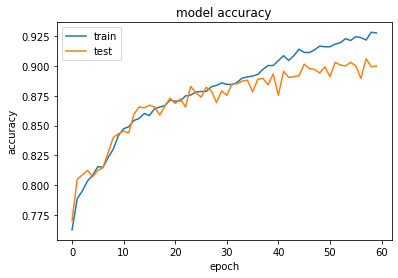

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

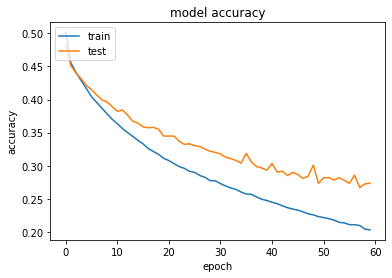

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_auc_score

predictions = ANN_classifier.predict(X_test)
predictions = predictions>0.5

acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print('Accuracy: {:.3f}' .format(acc))
print('Precision: {:.3f}' .format(precision))
print('Recall: {:.3f}' .format(recall))
print('F1 Score {:.3f}' .format(f1))
print('ROC AUC: {:.3f}' .format(roc_auc))

90/90 [==============================] - 0s 959us/step
Accuracy: 0.902
Precision: 0.847
Recall: 0.975
F1 Score 0.906
ROC AUC: 0.904


In [29]:
from sklearn.metrics import classification_report as rep
report = rep(predictions,y_test)
print(report)

              precision    recall  f1-score   support

       False       0.83      0.97      0.90      1263
        True       0.97      0.85      0.91      1606

    accuracy                           0.90      2869
   macro avg       0.90      0.91      0.90      2869
weighted avg       0.91      0.90      0.90      2869

